# DistribuNim I - Problem 899

<p>
Two players play a game with two piles of stones. The players alternately take stones from one or both piles, subject to:</p>

<ol>
<li>the total number of stones taken is equal to the size of the smallest pile before the move;</li>

<li>the move cannot take all the stones from a pile.</li>
</ol>

<p>
The player that is unable to move loses.</p>

<p>
For example, if the piles are of sizes 3 and 5 then there are three possible moves.
$$(3,5) \xrightarrow{(2,1)} (1,4)\qquad\qquad (3,5) \xrightarrow{(1,2)} (2,3)\qquad\qquad (3,5) \xrightarrow{(0,3)} (3,2)$$</p>

<p>
Let $L(n)$ be the number of ordered pairs $(a,b)$ with $1 \leq a,b \leq n$ such that the initial game position with piles of sizes $a$ and $b$ is losing for the first player assuming optimal play.</p>

<p>
You are given $L(7) = 21$ and $L(7^2) = 221$.</p>

<p>
Find $L(7^{17})$.</p>


## Solution.

In [1]:
from functools import cache
import numpy as np
import matplotlib.pyplot as plt

In [2]:
@cache
def lose(a, b):
    '''
    returns True if 1st player loses
    '''
    if a == 1:
        if b%2 == 1:
            return True
        return False

    if b == 1:
        if a%2 == 1:
            return True
        return False
        
    if a == b:
        for i in range(1, a, 1):
            if lose(a-i, i) == True:
                return False
    
    elif a < b:
        for i in range(a):
            if lose(a-i, b-(a-i)) == True:
                return False

    elif b < a:
        for i in range(b):
            if lose(a-(b-i), b-i) == True:
                return False
    
    return True
    

In [3]:
def visualise(n, color1='red', color2='green', border_color='black', border_thickness=0.5):
    fig, ax = plt.subplots()

    for i in range(n):
        for j in range(n):
            if lose(i+1, j+1):
                color = color1
            else:
                color = color2
            rect = plt.Rectangle((i, j), 1, 1, facecolor=color, edgecolor=border_color, linewidth=border_thickness)
            ax.add_patch(rect)
    
    ax.set_xlim(0, n)
    ax.set_ylim(0, n)
    ax.set_aspect('equal')
    

    ax.axis('off')

    plt.show()

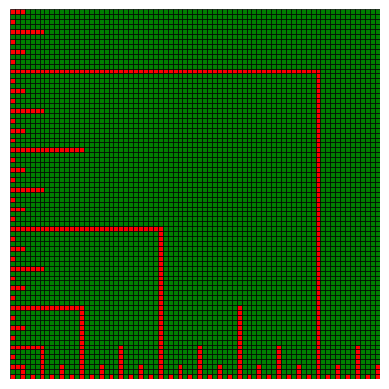

In [4]:
visualise(75)

In [18]:
@cache
def sum_between(n):
    '''
    Finds the number of red squares strictly below the main diagonal between 2^n and 2^(n+1) - 2
    '''
    if n == 0 or n == 1:
        return 0

    return 2 * sum_between(n-1) + 2**(n-1) - 1

In [29]:
@cache
def partial_sum_between(n, k):
    '''
    Finds the number of red squares strictly below the main diagonal between 2^n and k where 2^n <= k < 2^(n+1) - 1
    '''
    k = k - 2**n + 1
    l = 1
    u = 2**n - 1

    

    if k == u:
        ans += (2**(n+1) - 2)
    
    return ans

In [48]:
def L(n):
    ans = 0
    
    k = 0
    while 2**(k+1) < n:
        ans += 2 * sum_between(k) + 2*(2**(k+1) - 2) + 1
        k += 1


    
    return ans

In [49]:
L(7)

6